In [16]:
import pandas as pd
import sklearn

In [17]:
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [18]:
import matplotlib.pyplot as plt

In [19]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df =pd.DataFrame(X,columns=iris.feature_names)
dfclass=pd.DataFrame(iris.target,columns=['class'])
df=pd.concat([df,dfclass],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

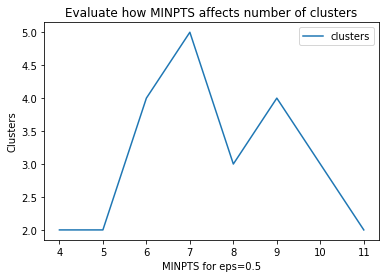

In [21]:
xs=range(4,12)
clus=[]

for i in xs:
    kclu=DBSCAN(eps=0.5, min_samples=i)
    kclu.fit(X)
    n_clusters_ = len(set(kclu.labels_)) - (1 if -1 in kclu.labels_ else 0)
    clus.append(n_clusters_)

plt.plot(xs,clus)
plt.xlabel('MINPTS for eps=0.5')
plt.ylabel('Clusters')
plt.title('Evaluate how MINPTS affects number of clusters')
plt.legend(['clusters'])
plt.show()

In [22]:
kclu=DBSCAN(eps=0.5, min_samples=8)

In [23]:
kclu.fit(X)

DBSCAN(min_samples=8)

In [24]:
kclu.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1,  2,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        2,  2,  2, -1, -1, -1, -1, -1,  2, -1,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  2,  1,  2,  2,  2, -1,  2,  2,  2, -1,  2, -1, -1])

In [25]:
dfcluster=pd.DataFrame(kclu.labels_,columns=['cluster'])
dfall=pd.concat([df,dfcluster],axis=1)
dfall = dfall[dfall.cluster != -1]
len(dfall)

91

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
confusion_matrix(dfall['class'], dfall['cluster'])

array([[42,  0,  0],
       [ 0, 30,  1],
       [ 0,  2, 16]])

In [27]:
dfall.iloc[:,0:4].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
Xnew=dfall.iloc[:,0:4]

### Internal Cluster Validity Metrics

In [29]:
metrics.calinski_harabasz_score(Xnew, dfall['cluster']) 

720.8702508103424

In [30]:
metrics.silhouette_score(Xnew, dfall['cluster'], metric='euclidean')

0.6952815875467633

### External Cluster Validity Metrics

In [31]:
metrics.fowlkes_mallows_score(dfall['class'], dfall['cluster'])

0.9535772018294802

In [32]:
metrics.adjusted_rand_score(dfall['class'], dfall['cluster']) 

0.9271206283790424

In [33]:
metrics.mutual_info_score(dfall['class'], dfall['cluster'])  

0.9202335799146757

In [34]:
metrics.homogeneity_score(dfall['class'], dfall['cluster']) 

0.8812476103369855

In [35]:
metrics.completeness_score(dfall['class'], dfall['cluster']) 

0.8867334208875504

In [36]:
metrics.v_measure_score(dfall['class'], dfall['cluster'])    

0.8839820047411485

In [37]:
### Plot clusters in 2D

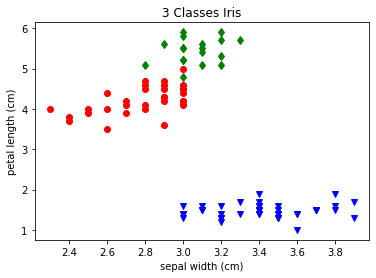

In [38]:
df0=dfall[dfall['class']==0]
df1=dfall[dfall['class']==1]
df2=dfall[dfall['class']==2]

plt.plot(df0[iris.feature_names[1]],df0[iris.feature_names[2]],'bv')
plt.plot(df1[iris.feature_names[1]],df1[iris.feature_names[2]],'ro')
plt.plot(df2[iris.feature_names[1]],df2[iris.feature_names[2]],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('3 Classes Iris')
plt.show()

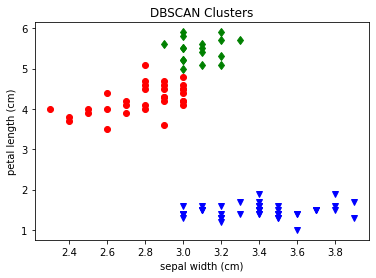

In [39]:
df0=dfall[dfall['cluster']==0]
df1=dfall[dfall['cluster']==1]
df2=dfall[dfall['cluster']==2]

plt.plot(df0[iris.feature_names[1]],df0[iris.feature_names[2]],'bv')
plt.plot(df1[iris.feature_names[1]],df1[iris.feature_names[2]],'ro')
plt.plot(df2[iris.feature_names[1]],df2[iris.feature_names[2]],'gd')

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title('DBSCAN Clusters')
plt.show()